# Lab 6 - Solar cycle

In today's lab, you are going to analyze sunspot data to measure how long the solar cycyle lasts. Our data for today comes from the National Oceanic and Atmospheric Administration's [Space Weather Prediction Center](https://www.swpc.noaa.gov/products/solar-cycle-progression).


Astronomy skills:
- Signal period and frequency
- Fourier transforms
- Solar cycle

Python skills:
- reading in data from a file
- finding maxima
- Fourier transforms






- read in data - number of sunspots per month

https://www.sidc.be/SILSO/datafiles

https://www.swpc.noaa.gov/products/solar-cycle-progression

- plot over time

- estimate period of solar cycle

- FT to get popular frequency

- find max frequency

- converting to period

- predict next maximum?


Start by importing the packages we'll need for this lab. The new packages are from SciPy and will help us do a Fourier transform.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

## Step 1 - Read in the data

In the Lab 6 zip file, there is a file called "Lab06_sunspots.csv", which tells us the average number of sunspots per month since 1750.

- Read in this file

- Make a plot for the number of sunspots over time. As per usual, make sure your plot has axis labels!



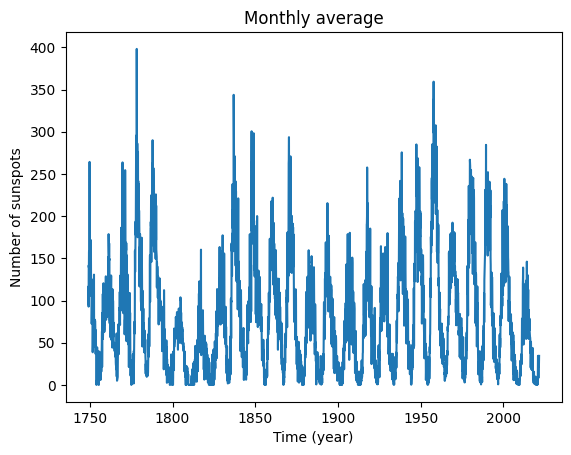

In [ ]:
time, number = np.loadtxt('Lab06_sunspots.csv', delimiter=',', skiprows=1, unpack=True)

plt.plot(time, number)
plt.xlabel('Time (year)')
plt.ylabel('Number of sunspots')
plt.title('Monthly average')
plt.show()

Then, make a new plot that zooms in on the three most recent solar cycles.

(1980.0, 2035.1628)

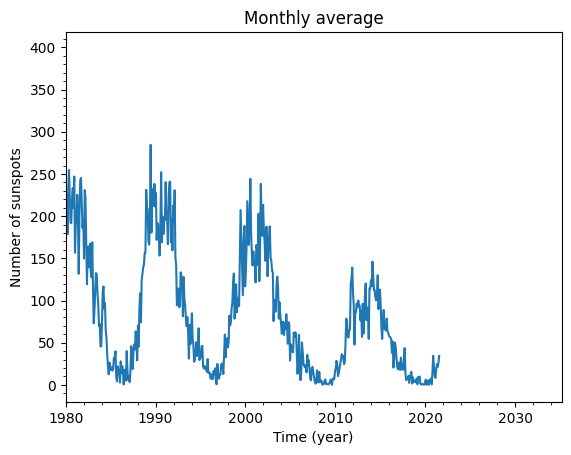

In [ ]:
# plot here
plt.plot(time, number)
plt.xlabel('Time (year)')
plt.ylabel('Number of sunspots')
plt.title('Monthly average')
plt.minorticks_on()
plt.xlim(1980)

**Question**: Based on your graph, estimate the period of the solar cycle and write your answer below.

In [ ]:
# answer here

#

## Step 2 - Fourier transform

Our goal is to find the period of the Sun's solar cycle, corresponding to how often the magnetic field flips. We could estimate the period from the graph, or we could do it numerically by finding the Fourier transform!


We can recreate any period signal by adding a bunch of sine waves together. A Fourier transform finds the frequencies of the sine waves needed to build your curve.







### Example analysis


Run the cell below to see an example of making a curve `y` by adding two sine waves together (a high amplitude, low frequency wave and a low amplitude, high frequency wave).



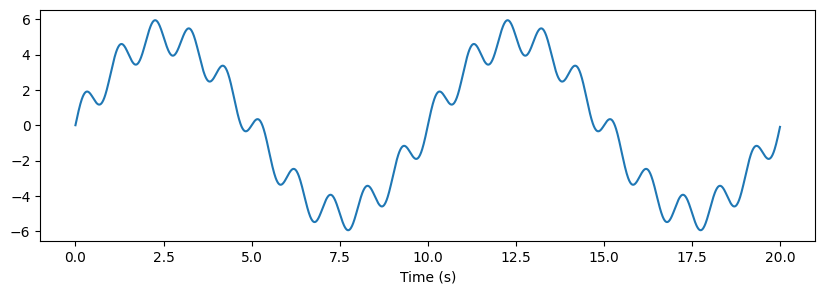

In [ ]:
# create example data set
x = np.arange(0, 20, 0.01)
y1 = 5*np.sin(2*np.pi*0.1*x)    # wave with period = 10 s
y2 = np.sin(2*np.pi*1*x)        # wave with period = 1 s

# combination of waves 1 and 2
y = y1 + y2

# plot the example curve
plt.figure(figsize=(10,3))
plt.plot(x, y)
plt.xlabel('Time (s)')
plt.show()

If we run a Fourier transform on this new curve, it will tell us the frequencies and strengths ("power") of the two individual sine waves that created it. Run the cell below to calculate the FT of our example data:


In [ ]:
# number of data points
N = len(y)

# time between data points
dt = x[1] - x[0]

# fourier transform
ft = fft(y)                   # calculate fourier transform
power = np.abs(ft)            # calculate power values
frequency = fftfreq(N, d=dt)  # calculate frequency values

# keep only the real (positive) frequency values
frequency = frequency[1:N//2]
power = power[1:N//2]

We can then make a plot of power `yf` vs. frequency `xf` for this example curve. This kind of plot is called a "power spectrum".

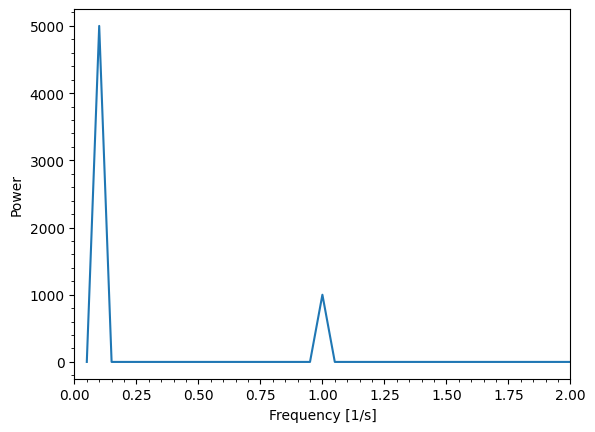

In [ ]:
# plot power spectrum here
plt.plot(frequency, power)
plt.xlabel('Frequency [1/s]')
plt.ylabel('Power')
plt.minorticks_on()
plt.xlim(0, 2)
plt.show()

The power spectrum for the example data show two peaks, $f_1=0.1 s^{-1}$ and $f_2=1.0 s^{-1}$. These are the frequencies of the two sine waves that make up the example curve. Frequency is cycles per unit time and period is the time per cycle, so they are the inverse of each other:
$$period = \frac{1}{frequency}$$
Therefore we get back the expected periods of 1 and 10 seconds, which were used to make the example data.

## Step 3 - Solar data analysis

Now we can run a Fourier transform on our sunspot data set and it will find the frequency of the solar cycle, which you could then use to calculate the period.

Use the example above to:
- calculate the Fourier transform of the sunspot data
- plot the power spectrum (power vs. frequency)
- find the frequency where the peak power occurs (numerically, not by eye!)
- calculate the period of the solar cycle from this frequency

Don't forget to add comments!


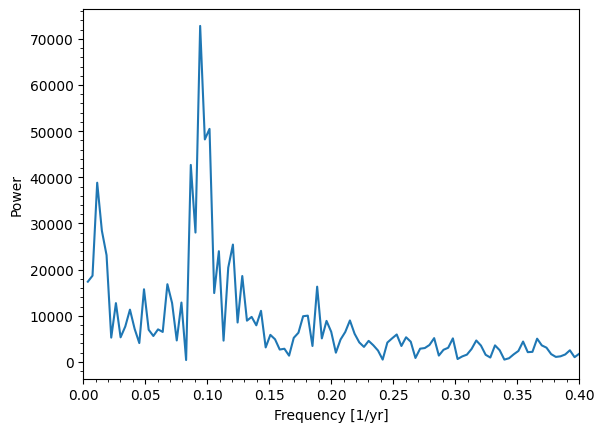

10.598040000017136 yr


In [ ]:
# code here

# number of data points
N = len(number)

# time between data points
dt = time[1] - time[0]

# fourier transform
ft = fft(number)              # calculate fourier transform
power = np.abs(ft)            # calculate power values
frequency = fftfreq(N, d=dt)  # calculate frequency values

# keep only the real (positive) frequency values
frequency = frequency[1:N//2]
power = power[1:N//2]

# plot power spectrum here
plt.plot(frequency, power)
plt.xlabel('Frequency [1/yr]')
plt.ylabel('Power')
plt.minorticks_on()
plt.xlim(0, 0.4)
plt.show()

peak = np.argmax(power)
freq = frequency[peak]
period = 1/freq
print(period, 'yr')

## Questions
1. How long does each solar cycle last (in years)?

2. When do you think the next two solar maxima will be?

In [ ]:
# answer here

# 1.  about 10.5 years

# 2.   the last one was in 2014, so the next will be about 2025 and 2036

# Bonus

If you have time left over, here are two other things to work on:

Option 1 -- The file "Lab06_flares.csv" has the xray flux measured since 2004, which approximates the number of solar flares that occured. Repeat the Fourier transform analysis this data set to estimate the period of the solar cycle. Do you get a similar answer from flares as from sunspot number?

\

Option 2 -- Practice Fourier transforms using this [simulation](https://phet.colorado.edu/sims/html/fourier-making-waves/latest/fourier-making-waves_all.html) to guess which frequencies and amplitudes are combined to make the given wave. (I recommend starting at Level 2, then working your way up to Level 3)


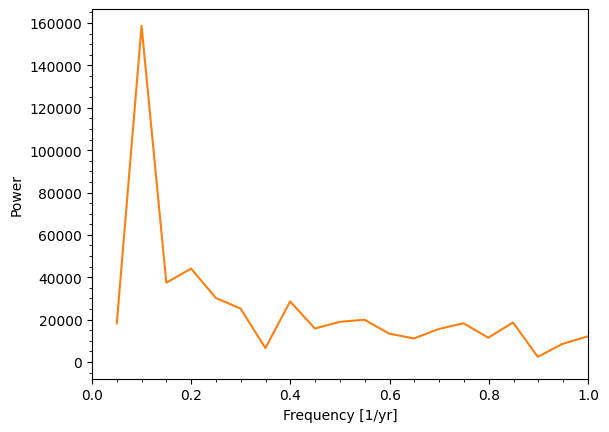

10.014300000016192 yr


In [ ]:
time, flares = np.loadtxt('Lab06_flares.csv', delimiter=',', unpack=True, skiprows=1)

plt.plot(time, flares)


# number of data points
N = len(flares)

# time between data points
dt = time[1] - time[0]

# fourier transform
ft = fft(flares)              # calculate fourier transform
power = np.abs(ft)            # calculate power values
frequency = fftfreq(N, d=dt)  # calculate frequency values

# keep only the real (positive) frequency values
frequency = frequency[1:N//2]
power = power[1:N//2]

# plot power spectrum here
plt.plot(frequency, power)
plt.xlabel('Frequency [1/yr]')
plt.ylabel('Power')
plt.minorticks_on()
plt.xlim(0, 1)
plt.show()

peak = np.argmax(power)
freq = frequency[peak]
period = 1/freq
print(period, 'yr')

---
# Final steps

**Turning in your lab**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.